# Mask R-CNN - Inspect BottleTrained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [ ]:
!pip install tensorflow==1.7

     |████████████████████████████████| 48.0MB 63kB/s 
     |████████████████████████████████| 3.1MB 58.0MB/s 
     |████████████████████████████████| 890kB 52.3MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=fb25d0297bd303030df90b01d712e7b9bfa59af1072250d9a4d408eed30f64eb
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [ ]:
!pip install keras==2.1.6

     |████████████████████████████████| 348kB 24.0MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 1.x selected.
Found GPU at: /device:GPU:0


In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/gdrive/My Drive/mask-rcnn/")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.building import building

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join('/content/gdrive/My Drive/mask-rcnn/', "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
BALLON_WEIGHTS_PATH = "/content/gdrive/My Drive/mask-rcnn/logs/building20200711T1918/mask_rcnn_building_0090.h5"  # TODO: update this path based on which weights you want to run inference on

## Configurations

In [ ]:
config = building.CustomConfig()
BALLOON_DIR = "/content/gdrive/My Drive/mask-rcnn/samples/building/dataset"

In [ ]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE       

## Notebook Preferences

In [ ]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [ ]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [ ]:
# Load validation dataset
dataset = building.CustomDataset()
dataset.load_custom(BALLOON_DIR, "val",2)

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 68
Classes: ['BG', 'building']


## Load Model

In [ ]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_balloon.h5"

# Or, load the last model you trained
weights_path = BALLON_WEIGHTS_PATH

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /content/gdrive/My Drive/mask-rcnn/logs/building20200711T1918/mask_rcnn_building_0090.h5






Re-starting from epoch 90


## Run Detection

60
image ID: building.building_161_input.jpg (60) /content/gdrive/My Drive/mask-rcnn/samples/building/dataset/val/building_161_input.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:   12.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -100.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
gt_class_id              shape: (5,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (5, 4)                min:    2.00000  max: 1018.00000  int32
gt_mask                  shape: (1024, 1024, 5)       min:    0.00000  max:    1.00000  bool


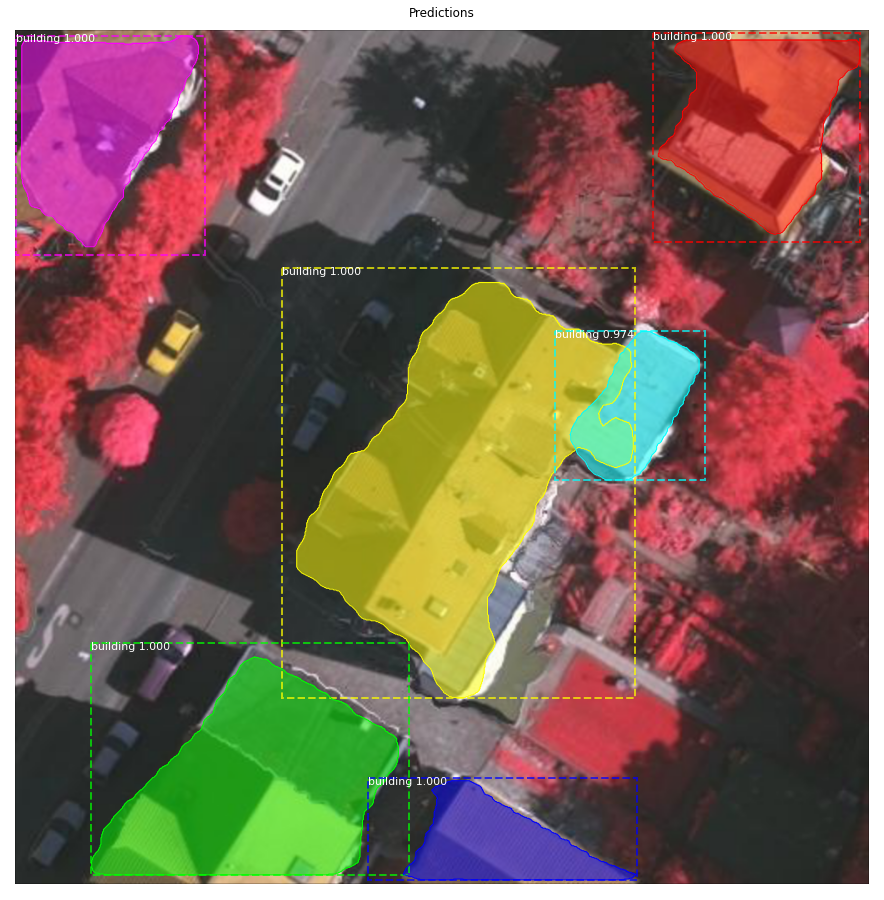

In [ ]:
image_id = random.choice(dataset.image_ids)
# image_id = 0
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
print (image_id)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import sys
import time
import numpy as np
import skimage.io
from PIL import Image
from scipy import ndimage

################################################## INFERENCE SCRIPT #############################################
def get_final_mask_per_sample(p):
    num_masks = p['masks'].shape[2]
    print("num_masks")
    print(num_masks)
    final_mask = p['masks'][:,:,0].astype(int)
    for i in range(1,num_masks):
        x = p['masks'][:,:,i].astype(int)
        final_mask += x
#         plt.figure()
#         plt.imshow(final_mask)
    return final_mask

def get_single_inst_pred(pred_np, building_num, dumm_save_dir):
    name = building_num + "_pred.png"
    plt.imsave(os.path.join(dumm_save_dir, name), pred_np)

    fname = os.path.join(dumm_save_dir, name)
    blur_radius = 1.0
    threshold = 50

    img = Image.open(fname).convert('L')
    img = np.asarray(img)
    print(img.shape)

    # smooth the image (to remove small objects)
    imgf = ndimage.gaussian_filter(img, blur_radius)
    threshold = 50

    # find connected components
    labeled, nr_objects = ndimage.label(imgf > threshold) 
    print("Number of objects is {}".format(nr_objects))

    center = labeled[256][256]

    print("center " + str(center))

    labeled[labeled != center] = 0
    labeled[labeled != 0] = 1

    print(labeled.max())
    print(labeled.min())
    print(labeled.shape)
    return labeled
    
    

#for our metrics scripts
#img_dir = path to data/vaihingen_mulit/test/images
#label_dir = path to cvpr2020/building_v_multi
#output_dir = data/vaihingen_multi/test/inf_pretrain_no_tune

# V MULTI
img_dir_mv = "/content/gdrive/My Drive/mask-rcnn/samples/building/dataset/val"
label_dir_mv = "/Users/dsengupta/CVPR2020/original_building_datasets/buildings_train_test_split_cvpr2020_multi_inst/buildings_v_cvpr2020/test/"
output_dir_mv = "/content/gdrive/My Drive/mask-rcnn/samples/building/dataset/pred_npys" #THIS IS WHERE PRED NPYS ARE SAVED


def get_inferences_mask_rcnn_multi(img_dir, label_dir, output_dir, dataset):
    image_id = 0
    for filename in sorted(os.listdir(img_dir)):
      if ".jpg" in filename:
        building_num = filename.split("_")[1]
        img_path = os.path.join(img_dir, filename)
        import pdb 
        # pdb.set_trace()
        image = skimage.io.imread(img_path)
        # image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
        if image.shape[2] != 3:
          image_id += 1
          continue
        else:
          image_id += 1
          predictions = model.detect([image]*config.BATCH_SIZE, verbose=1) # We are replicating the same image to fill up the batch_size
          p = predictions[0]
          pred_np = get_final_mask_per_sample(p)
          pred_name = building_num + '_pred.npy'
          
          #load image as npy array
          # gt_name = building_num + '_gt.npy'
          # if dataset == 'bing':
          #     gt_img = 'building_' + building_num +"_label.png"
          # elif dataset == "vaihingen":
              # gt_img = 'building_' + building_num +"_label.tif"
          # gt_image_path = os.path.join(label_dir, gt_img)
          # gt = Image.open(gt_image_path)
          # gt_np = np.array(gt)
          
          #save pred and gt npys
          np.save(os.path.join(output_dir, pred_name), pred_np)
          # np.save(os.path.join(output_dir, gt_name), gt_np)
        
        
######## HEREER ################
def get_inferences_mask_rcnn_single(label_dir, output_dir_multi, output_dir_single, dumm_save_dir, dataset):
    for filename in sorted(os.listdir(output_dir_multi)):
        if "_pred.npy" in filename:
            building_num = filename.split("_")[0]
#             img_path = os.path.join(img_dir, filename)
#             image = skimage.io.imread(img_path)
#             predictions = model.detect([image]*config.BATCH_SIZE, verbose=1) # We are replicating the same image to fill up the batch_size
#             p = predictions[0]
            import pdb
            pdb.set_trace()
            p = np.load(os.path.join(output_dir_multi, filename))
            #get single (center) instance
            pred_np = get_single_inst_pred(p, building_num, dumm_save_dir)
            pred_name = building_num + '_pred.npy'
            import pdb
#             pdb.set_trace()
            #load image as npy array
            # gt_name = building_num + '_gt.npy'
            # if dataset == 'bing':
            #     gt_img = 'building_' + building_num +"_label.png"
            # elif dataset == "vaihingen":
            #     gt_img = 'building_' + building_num +"_label.tif"
            # gt_image_path = os.path.join(label_dir, gt_img)
            # gt = Image.open(gt_image_path)
            # gt_np = np.array(gt)

            #save pred and gt npys
            np.save(os.path.join(output_dir_single, pred_name), pred_np)
            # np.save(os.path.join(output_dir_single, gt_name), gt_np)




In [ ]:
get_inferences_mask_rcnn_multi(img_dir_mv, label_dir_mv, output_dir_mv, "vaihingen")

Processing 1 images
image                    shape: (512, 512, 3)         min:    8.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min:  -95.80000  max:  145.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
num_masks
7
Processing 1 images
image                    shape: (512, 512, 3)         min:    9.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min:  -97.80000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
num_masks
5
Processing 1 images
image                    shape: (512, 512, 3)         min:    8.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min:

(512, 512)
1
0


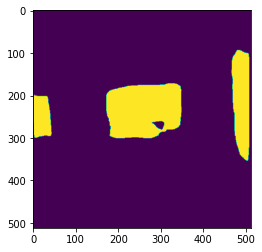

In [ ]:
x = np.load("/content/gdrive/My Drive/mask-rcnn/samples/building/dataset/pred_npys_20/114_pred.npy")
print (x.shape)
print(x.max())
print(x.min())
# x[x!=0] = 1
plt.figure()
plt.imshow(x)

In [ ]:
# get_inferences_mask_rcnn_single(label_dir_sv, output_dir_multi_sv, output_dir_sv, dumm_save_dir_sv, "vaihingen")